First we should install spotipy librarie

In [2]:
! pip install spotipy

Spotify object with the Spotify developer’s credentials, stored in the variables CLIENT_ID and CLIENT_SECRET.

In [9]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentails_manager = SpotifyClientCredentials(client_id= CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = client_credentails_manager)

## Fetch Tracks and Artists

In [10]:
# Data quering
# The q parameter in the sp.search() method is where you can search for specific items.
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0,1000,50):
    track_result = sp.search(q="year:2021", type="track", limit=50,offset = i)
    for i, t in enumerate(track_result["tracks"]["items"]):
        artist_name.append(t["artists"][0]["name"])
        artist_id.append(t["artists"][0]["id"])
        track_name.append(t["name"])
        track_id.append(t["id"])
        track_popularity.append(t["popularity"])

Put the queried data into the Pandas Dataframe.

In [16]:
import pandas as pd
track_df = pd.DataFrame({"artist_name":artist_name, "track_name":track_name,
                         "track_id":track_id,"track_popularity":track_popularity,
                         "artist_id":artist_id})
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Carolina Gaitán - La Gaita,We Don't Talk About Bruno,52xJxFP6TqMuO4Yt0eOkMz,95,29PgYEggDV3cDP9QYTogwv
1,LYMEY,END OF YEAR 2021,6usFCFN0F69JcAaHtB55sg,28,6dPOSlnP4zgYg7bkAkp4dY
2,Coldplay,My Universe,3FeVmId7tL5YN8B7R3imoM,92,4gzpq5DPGxSnKTe4SA8HAU
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,66,4qmHkMxr6pTWh5Zo74odpH
4,Kodak Black,Super Gremlin,4A8cWXxKfIL3lAyUDzXbCF,90,46SHBwWsqBkxI7EeeBEQG7


Let’s add information about artists who perform each of the 1000 tracks.

In [17]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
    artist = sp.artist(a_id)
    artist_popularity.append(artist["popularity"])
    artist_genres.append(artist["genres"])
    artist_followers.append(artist["followers"]["total"])

Now add it to the track_df data frame.

In [19]:
track_df = track_df.assign(artist_popularity = artist_popularity,artist_genres= artist_genres, artist_followers = artist_followers)
track_df.head(10)

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Carolina Gaitán - La Gaita,We Don't Talk About Bruno,52xJxFP6TqMuO4Yt0eOkMz,95,29PgYEggDV3cDP9QYTogwv,79,[],22875
1,LYMEY,END OF YEAR 2021,6usFCFN0F69JcAaHtB55sg,28,6dPOSlnP4zgYg7bkAkp4dY,18,[],377
2,Coldplay,My Universe,3FeVmId7tL5YN8B7R3imoM,92,4gzpq5DPGxSnKTe4SA8HAU,92,"[permanent wave, pop]",34841381
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,66,4qmHkMxr6pTWh5Zo74odpH,59,"[art rock, folk rock, mellow gold, new wave po...",224895
4,Kodak Black,Super Gremlin,4A8cWXxKfIL3lAyUDzXbCF,90,46SHBwWsqBkxI7EeeBEQG7,86,"[florida rap, hip hop, melodic rap, miami hip ...",7947578
5,Zager & Evans,In the Year 2525,3LdLGNKCW0dNr14JQlZPQt,41,55IyYO6fmYpYw6Nd4YF7bw,40,"[bubblegum pop, folk rock]",8099
6,Benny The Butcher,Johnny P's Caddy,6AshXllQhobwSXsdpgp41w,79,5Matrg5du62bXwer29cU5T,73,"[boom bap, buffalo hip hop, hip hop, rap, upst...",229831
7,Amaranta,Medley Picaflor de Los Andes - Live Streaming ...,5PraiQQAIkl0xw6pSFVX5h,27,18MbBAbtk2Knvmk75JXFqd,45,"[huayno peruano, tunantada]",26952
8,Drake,Knife Talk (with 21 Savage ft. Project Pat),2BcMwX1MPV6ZHP4tUT9uq6,90,3TVXtAsR1Inumwj472S9r4,98,"[canadian hip hop, canadian pop, hip hop, rap,...",62190603
9,Elvis Costello & The Attractions,"Radio, Radio - 2021 Remaster",0qvo5kciIqZJn1t8jdfqDn,50,4qmHkMxr6pTWh5Zo74odpH,59,"[art rock, folk rock, mellow gold, new wave po...",224895


## Fetch Tracks’ Numerical Features

First, discover what features contribute to a track’s profile at the Spotify API reference page

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

Second, fetch the tracks’ features and add them to the data frame.

In [24]:
track_features = []
for t_id in track_df["track_id"]:
    af = sp.audio_features(t_id)
    track_features.append(af)
tf_df =pd.DataFrame(columns=["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "type", "id", "uri", "track_href", "analysis_url", "duration_ms", "time_signature"])
for item in track_features:
    for feat in item:
        tf_df = tf_df.append(feat,ignore_index=True)
tf_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.577,0.450,0,-8.516,0,0.0834,0.35700,0,0.111,0.830,205.863,audio_features,52xJxFP6TqMuO4Yt0eOkMz,spotify:track:52xJxFP6TqMuO4Yt0eOkMz,https://api.spotify.com/v1/tracks/52xJxFP6TqMu...,https://api.spotify.com/v1/audio-analysis/52xJ...,216120,4
1,0.429,0.829,6,-5.071,0,0.0604,0.02380,0.000174,0.673,0.278,127.083,audio_features,6usFCFN0F69JcAaHtB55sg,spotify:track:6usFCFN0F69JcAaHtB55sg,https://api.spotify.com/v1/tracks/6usFCFN0F69J...,https://api.spotify.com/v1/audio-analysis/6usF...,1472769,4
2,0.588,0.701,9,-6.390,1,0.0402,0.00813,0,0.200,0.443,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,228000,4
3,0.645,0.809,11,-6.120,1,0.0385,0.00921,0.00108,0.106,0.966,138.978,audio_features,3oyc1mIdCBGaU55wX7otqM,spotify:track:3oyc1mIdCBGaU55wX7otqM,https://api.spotify.com/v1/tracks/3oyc1mIdCBGa...,https://api.spotify.com/v1/audio-analysis/3oyc...,196680,4
4,0.825,0.414,2,-6.634,1,0.1440,0.00265,0,0.357,0.106,72.993,audio_features,4A8cWXxKfIL3lAyUDzXbCF,spotify:track:4A8cWXxKfIL3lAyUDzXbCF,https://api.spotify.com/v1/tracks/4A8cWXxKfIL3...,https://api.spotify.com/v1/audio-analysis/4A8c...,200548,4


In [25]:
# There are a few redundant columns which we will drop in the following cells
cols_to_drop2 = ["key","mode","type","uri","track_href","analysis_url"]
tf_df = tf_df.drop(columns= cols_to_drop2)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1000 non-null   float64
 1   energy            1000 non-null   float64
 2   loudness          1000 non-null   float64
 3   speechiness       1000 

In [26]:
# column types’ inference
track_df["artist_name"] = track_df["artist_name"].astype("string")
track_df["track_name"] = track_df["track_name"].astype("string")
track_df["track_id"] = track_df["track_id"].astype("string")
track_df["artist_id"] = track_df["artist_id"].astype("string")

tf_df["duration_ms"] = pd.to_numeric(tf_df["duration_ms"])
tf_df["instrumentalness"] = pd.to_numeric(tf_df["instrumentalness"])
tf_df["time_signature"] = pd.to_numeric(tf_df["time_signature"])

print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1000 non-null   float64
 1   energy            1000 non-null   float64
 2   loudness          1000 non-null   float64
 3   speechiness 

## Exploring the Trends of 2021

Looking for the most popular tracks of 2021 ?

In [31]:
track_df.sort_values(by = ["track_popularity"], ascending=False)[["track_name","artist_name"]].head(20)

,track_name,artist_name
12,abcdefu,GAYLE
16,Enemy (with JID) - from the series Arcane Leag...,Imagine Dragons
22,Woman,Doja Cat
20,STAY (with Justin Bieber),The Kid LAROI
40,Cold Heart - PNAU Remix,Elton John
316,Envolver,Anitta
50,Bad Habits,Ed Sheeran
36,Shivers,Ed Sheeran
168,Where Are You Now,Lost Frequencies
18,THATS WHAT I WANT,Lil Nas X


Who’s followed the most?

In [32]:
by_art_fol = pd.DataFrame(track_df.sort_values(by = ["artist_followers"], ascending= False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)

,artist_followers,artist_popularity,artist_name,artist_genres
686,94681454,96,Ed Sheeran,"['pop', 'uk pop']"
820,62190603,98,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
46,59481615,92,Billie Eilish,"['art pop', 'electropop', 'pop']"
54,58472746,96,Justin Bieber,"['canadian pop', 'pop']"
680,50993882,98,Taylor Swift,['pop']
238,47437284,96,BTS,"['k-pop', 'k-pop boy group']"
70,45818901,100,Bad Bunny,"['latin', 'reggaeton', 'trap latino']"
92,43188165,97,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."
728,39160498,92,Bruno Mars,"['dance pop', 'pop']"
468,39069457,92,Imagine Dragons,"['modern rock', 'rock']"


Let’s see how many genres there are in the track_df data frame:

In [34]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])
to_1D(track_df["artist_genres"]).value_counts().head(20)

progressive house       235
trance                  212
uplifting trance        165
progressive trance      164
pop                     153
edm                     148
pop dance               141
rap                     104
hip hop                  59
dance pop                57
trap                     50
contemporary country     49
dutch trance             44
rock                     43
art rock                 39
mellow gold              39
folk rock                38
roots rock               36
power pop                35
new wave pop             35
dtype: int64

Visualise the results

Text(0.5, 1.0, 'Top Genres')

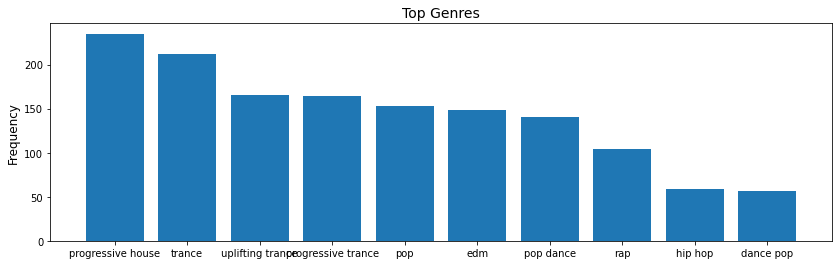

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(track_df["artist_genres"]).value_counts().index[:10],
       to_1D(track_df["artist_genres"]).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top Genres", size = 14)

top 20 artists sorted by the number of followers for each of top 10 genres

In [41]:
top_ten_genres = list(to_1D(track_df["artist_genres"]).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_ten_genres:
    for index, row in by_art_fol.iterrows():
        if genre in row["artist_genres"]:
            top_artists_by_genre.append({"artist_name":row["artist_name"], "artist_genre": genre})
            break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Armin van Buuren,progressive house
1,Tiësto,trance
2,Above & Beyond,uplifting trance
3,Above & Beyond,progressive trance
4,Ed Sheeran,pop
5,Marshmello,edm
6,Marshmello,pop dance
7,Drake,rap
8,Drake,hip hop
9,Bruno Mars,dance pop


Top 20 tracks sorted by popularity for each of top 10 genres

In [43]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending=False)[['track_popularity','track_name', 'artist_name','artist_genres', 'track_id']])
by_track_pop.astype(str).drop_duplicates().head(20)
top_songs_by_genre = []
for genre in top_ten_genres:
    for index, row in by_track_pop.iterrows():
        if genre in row['artist_genres']:
            top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
            break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,Asylum (Mixed),45,Super8 & Tab,progressive house
1,The Motto,95,Tiësto,trance
2,Asylum (Mixed),45,Super8 & Tab,uplifting trance
3,Asylum (Mixed),45,Super8 & Tab,progressive trance
4,Woman,97,Doja Cat,pop
5,Where Are You Now,96,Lost Frequencies,edm
6,Where Are You Now,96,Lost Frequencies,pop dance
7,One Right Now (with The Weeknd),92,Post Malone,rap
8,Knife Talk (with 21 Savage ft. Project Pat),90,Drake,hip hop
9,Woman,97,Doja Cat,dance pop


## Visualising Tracks’ Features

Correlation matrix of the tracks’ features

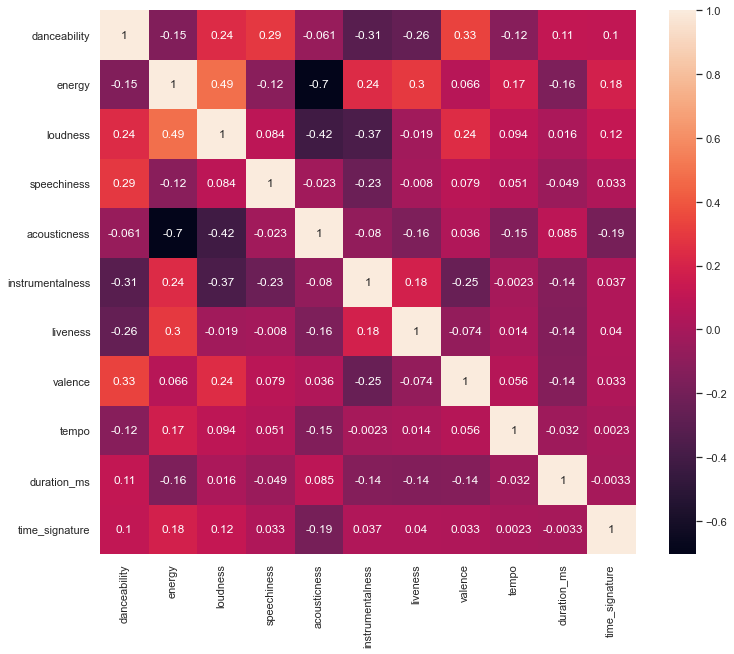

In [46]:
import seaborn as sn
sn.set(rc = {"figure.figsize":(12,10)})
sn.heatmap(tf_df.corr(), annot = True)
plt.show()

You could also plot a bivariate KDE for a specific pair of variables:

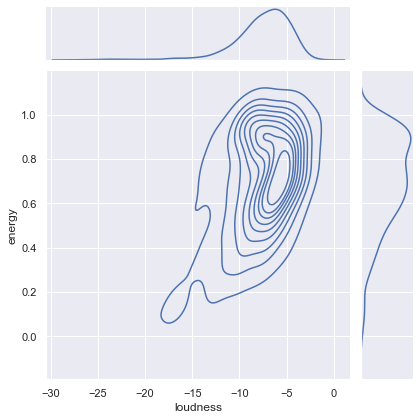

In [47]:
sn.set(rc = {'figure.figsize':(20,20)})
sn.jointplot(data=tf_df, x="loudness", y="energy", kind="kde")

## Get Recommendations

The last step in our analysis is to get track recommendations given artist id, 

genre, and track id. The output is randomised, so Spotify never runs out of content suggestions.

In [50]:
rec = sp.recommendations(seed_artists=["3TVXtAsR1Inumwj472S9r4"], seed_genres=["hip hop"], seed_tracks=["2BcMwX1MPV6ZHP4tUT9uq6"], limit= 100)
for track in rec["tracks"]:
    print(track["artists"][0]["name"],track["name"])

JID Surround Sound (feat. 21 Savage & Baby Tate)
J. Cole p r i d e . i s . t h e . d e v i l (with Lil Baby)
Kodak Black Tunnel Vision
Drake Chicago Freestyle (feat. Giveon)
A$AP Rocky L$D
DaBaby Red Light Green Light
Childish Gambino Les
Gunna too easy
Lil Uzi Vert 20 Min
Mike Dimes BACKROOM
Jack Harlow Already Best Friends (feat. Chris Brown)
Nicki Minaj Do We Have A Problem?
Kendrick Lamar All The Stars (with SZA)
Lil Tjay Headshot (feat. Polo G & Fivio Foreign)
Big Sean I Know
Travis Scott CAN'T SAY
Pop Smoke Element
Playboi Carti Sky
Rae Sremmurd This Could Be Us
Drake Headlines
Baby Keem trademark usa
Ty Dolla $ign Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mustard) - Remix
Comethazine Spinback
A Boogie Wit da Hoodie Me and My Guitar
Lil Baby Ready (feat. Gunna)
Travis Scott MAFIA
Blxst Chosen (feat. Ty Dolla $ign)
Kanye West Father Stretch My Hands Pt. 1
Money Man 24 (feat. Lil Baby)
DJ Khaled POPSTAR (feat. Drake)
6LACK PRBLMS
Baby Keem family ties (with Kendrick Lamar)
Kodak B